In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Loading Data

In [54]:
diamonds_df = pd.read_csv('diamonds.csv')

diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53930 non-null  int64  
 1   carat       53930 non-null  float64
 2   cut         53930 non-null  object 
 3   color       53930 non-null  object 
 4   clarity     53930 non-null  object 
 5   depth       50968 non-null  float64
 6   table       53930 non-null  float64
 7   price       53930 non-null  int64  
 8   x           52840 non-null  float64
 9   y           53345 non-null  float64
 10  z           53930 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [60]:
diamonds_df['cut'] = diamonds_df['cut'].str.replace(r'[^a-zA-Z]','', regex=True) 
diamonds_df['clarity'] = diamonds_df['clarity'].str.replace(r'[^a-zA-Z0-9]','', regex=True) 
diamonds_df['color'] = diamonds_df['color'].str.replace(r'[^a-zA-Z]','', regex=True) 

We can calculate the total price and carat since there are no missing values in these fields. However, the dimensions (x, y) and depth contain null values, which could skew the analysis.

In [158]:
coord = pd.read_csv('coords_diamonds.csv')

coord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53930 non-null  int64  
 1   latitude    53930 non-null  object 
 2   longitude   53930 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [159]:
coord['latitude'] = coord['latitude'].str.replace(r'[^\d\.]','', regex=True) 

In [160]:
coord['longitude'] = coord['longitude '].astype('float64')
coord['latitude'] = coord['latitude'].astype('float64')


The locations of all diamonds are accurately recorded.

# EDA

## Clarity, Cut and Colors

In [420]:
total_price = diamonds_df['price'].sum()
total_carat = diamonds_df['carat'].sum()

print(f'The stolen diamonds have a total value of $ {total_price/1e6:.1f} that represents a total weight of {total_carat/1e3:.1f} K carats')

The stolen diamonds have a total value of $ 212.1 that represents a total weight of 43.0 K carats


In [444]:
most_stolen = diamonds_df[diamonds_df['clarity'].isin(['SI1', 'SI2', 'VS1', 'VS2'])]

price_most = most_stolen['price'].sum()
carat_most = most_stolen['carat'].sum()

perc_price = price_most/total_price


print(f'Diamonds with clarity grades S, VS and VVS represent the {perc_price*100:.1f}% ($ {price_most/1e6:.1f}M) of the total solen value($ {total_price/1e6:.1f}M)')

Diamonds with clarity grades S, VS and VVS represent the 84.0% ($ 178.2M) of the total solen value($ 212.1M)


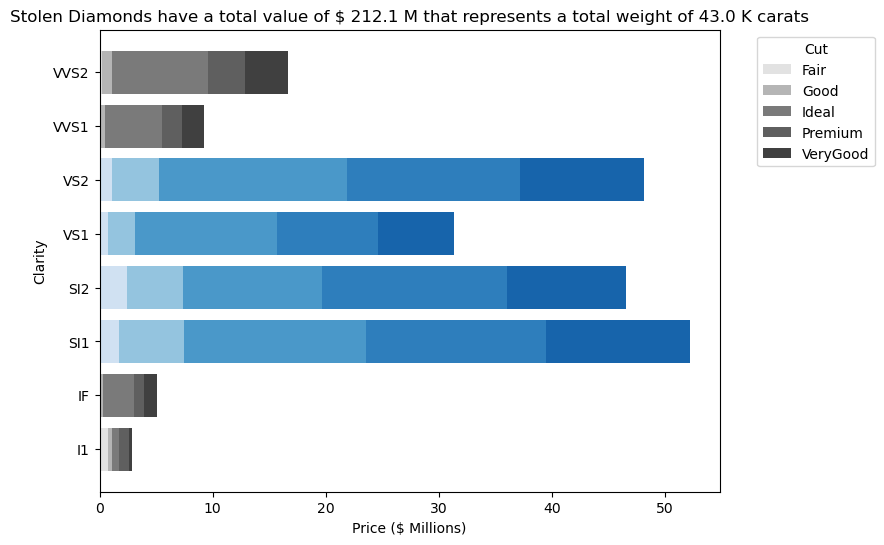

AttributeError: 'Axes' object has no attribute 'savefig'

In [440]:
value = 'price' #'carat'


data =(diamonds_df.groupby(['cut', 'clarity'])[[value]].sum()/1e6).reset_index()

data = data.pivot_table(index = 'clarity', columns = 'cut', values = value, fill_value = 0).reset_index()

# Configuración de colores: escala de grises para "Fair" y "Good", escala de azul para los demás
clarity_colors = { 'I1': 'Greys'
    , 'IF': 'Greys'
    , 'VVS1': 'Greys'
    , 'VVS2': 'Greys'
    , 'SI1': 'Blues'
    , 'SI2': 'Blues'
    , 'VS1': 'Blues' 
    , 'VS2': 'Blues' 
}

# Crear la gráfica de barras apiladas
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar cada categoría de corte (Cut) con su color correspondiente
for i, cut in enumerate(data['clarity'].unique()):
    # Seleccionar el cmap dependiendo del tipo de corte
    cmap = plt.get_cmap(clarity_colors[cut])
    colors = cmap([0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0])  # Escala de colores

    # Graficar cada barra apilada
    bottom = 0
    for j, color in enumerate(data.columns[1:]):
        ax.barh(cut, data.loc[i, color], left=bottom, color=colors[j], label=color if i == 0 else "")
        bottom += data.loc[i, color]

# Etiquetas y título
ax.set_xlabel("Price ($ Millions)")
ax.set_ylabel("Clarity")
ax.legend(title="Cut", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'Stolen Diamonds have a total value of $ {total_price/1e6:.1f} M that represents a total weight of {total_carat/1e3:.1f} K carats')
plt.show()
ax.savefig('clarity_grade.jpg')

In [445]:
cut = most_stolen[most_stolen['cut'].isin(['VeryGood', 'Premium', 'Ideal'])]['price'].sum()

perc_cut = cut/total_price*100
print(f'The stolen diamonds with the best cuts (ranging from  VeryGood to Ideal) and the highest clarities  are the {perc_cut:.1f}% of the total stolen diamonds ')

The stolen diamonds with the best cuts (ranging from  VeryGood to Ideal) and the highest clarities  are the 73.1% of the total stolen diamonds 


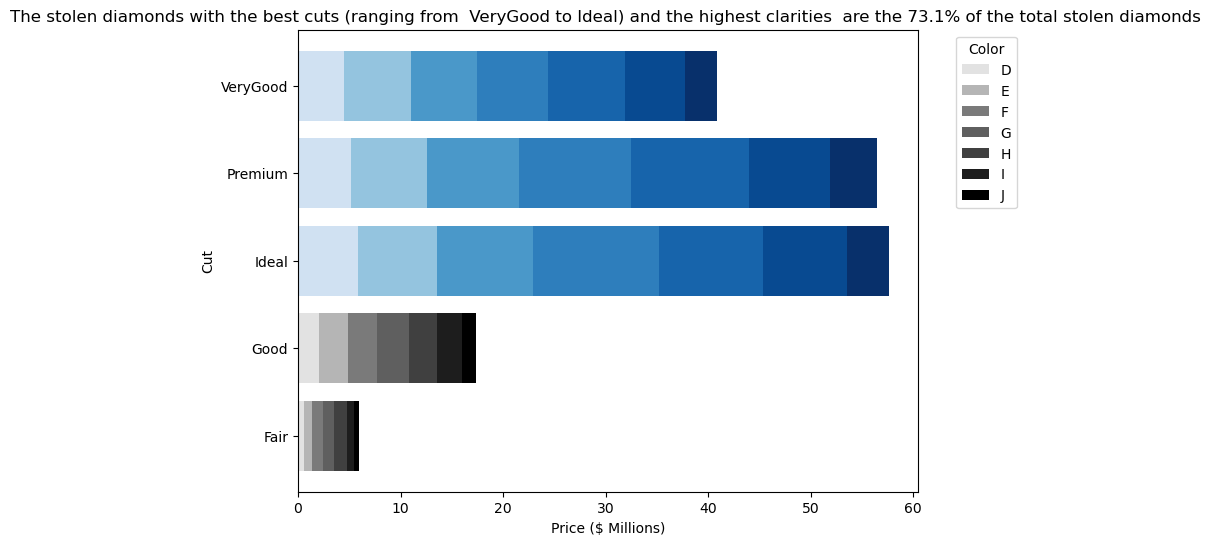

<Figure size 640x480 with 0 Axes>

In [446]:

# Ejemplo de datos
data = most_stolen.groupby(['cut', 'color'])[['carat', 'price']].sum()/1e6

data = data.pivot_table(index = 'cut', columns = 'color', values = value, fill_value = 0).reset_index()

# Configuración de colores: escala de grises para "Fair" y "Good", escala de azul para los demás
cut_colors = {
    'Fair': 'Greys',
    'Good': 'Greys',
    'VeryGood': 'Blues',
    'Premium': 'Blues',
    'Ideal': 'Blues'
}

# Crear la gráfica de barras apiladas
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar cada categoría de corte (Cut) con su color correspondiente
for i, cut in enumerate(data['cut'].unique()):
    # Seleccionar el cmap dependiendo del tipo de corte
    cmap = plt.get_cmap(cut_colors[cut])
    colors = cmap([0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0])  # Escala de colores

    # Graficar cada barra apilada
    bottom = 0
    for j, color in enumerate(data.columns[1:]):
        ax.barh(cut, data.loc[i, color], left=bottom, color=colors[j], label=color if i == 0 else "")
        bottom += data.loc[i, color]


ax.set_xlabel("Price ($ Millions)")
ax.set_ylabel("Cut")
ax.legend(title="Color", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'The stolen diamonds with the best cuts (ranging from  VeryGood to Ideal) and the highest clarities  are the {perc_cut:.1f}% of the total stolen diamonds ')
plt.show()
plt.savefig('cut_grades.png')


## Coordinates

I use geopandas to count the numbers of stolen diamonds per country with a geojson file. 

In [284]:
coord = coord[['longitude', 'latitude']]

coord['geometry'] = gpd.points_from_xy(coord['longitude'], coord['latitude'])

geo_coord  = gpd.GeoDataFrame(coord, geometry='geometry')

world = gpd.read_file('countries.geo.json')

coord_wcountries = geo_coord.sjoin(world, how='inner')

top10_countries = coord_wcountries.groupby('id')['longitude'].count().sort_values(ascending = False).head(10)

top10_countries

/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:2391: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326




In [442]:
total=coord['latitude'].count()

diamonds_usa = top10_countries[0]/total*100

print(f'{diamonds_usa:.2f}% of the stolen diamonds ({total/1e3:.1f} K) were robbed from USA ({top10_countries[0]/1e3:.1f} K)' )

85.95% of the stolen diamonds (53.9 K) were robbed from USA (46.4 K)


/var/folders/kc/z233bvvn0y7cp6460591q3_c0000gn/T/ipykernel_22337/115888641.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/kc/z233bvvn0y7cp6460591q3_c0000gn/T/ipykernel_22337/115888641.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



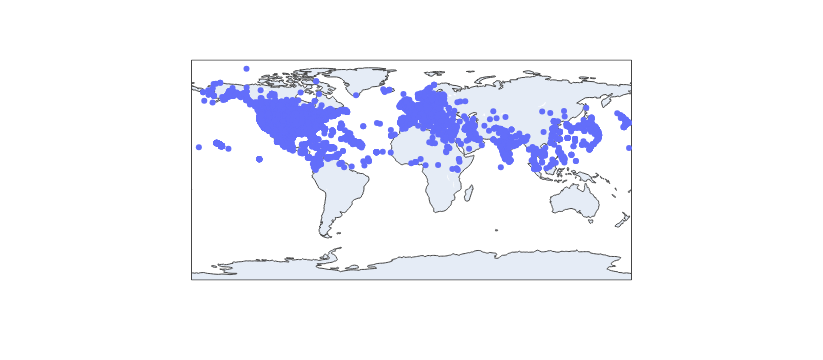

In [433]:
fig = px.scatter_geo(coord, lat='latitude', lon='longitude',
                     size_max=15,
                     color_continuous_scale='Viridis')  # Use the 'Viridis' colormap

fig.show()

fig.write_html('scatter_geo.html')

 ## Spatial Dimension of Diamonds

We fill the nulls values of depth with the median by each clarity, cut and color. 

/var/folders/kc/z233bvvn0y7cp6460591q3_c0000gn/T/ipykernel_22337/291757484.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




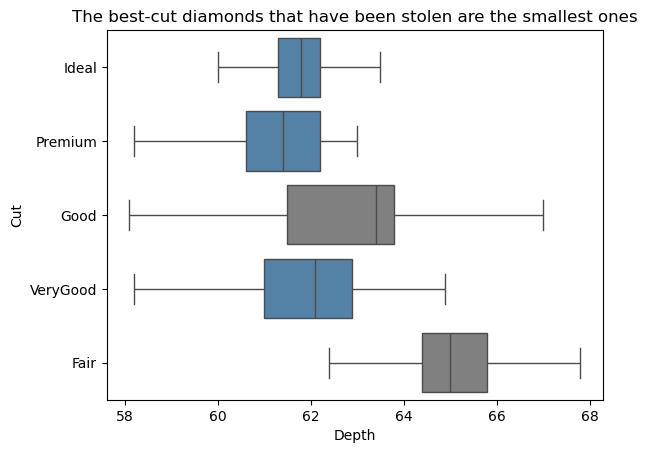

In [437]:
median_clarity = diamonds_df.groupby(['clarity', 'cut', 'color'])['depth'].median().reset_index()

#median_clarity
diamonds_fill = pd.merge(diamonds_df, median_clarity, on = ['clarity', 'cut', 'color'], how = 'left')

diamonds_fill['depth_x'] = diamonds_fill['depth_x'].fillna(diamonds_fill['depth_y'])

cat = 'cut'

colors = ['#4682b4' if cut in ['Ideal', 'Premium', 'VeryGood'] else '#808080' for cut in diamonds_fill['cut'].unique()]

#diamonds_fill[]
sns.boxplot(x='depth_x', y = cat, data=diamonds_fill
            , palette=colors
            , showfliers=False)
plt.xlabel('Depth')
plt.ylabel('Cut')
plt.title(f'The best-cut diamonds that have been stolen are the smallest ones')
plt.savefig('depth.png')

In [427]:
clar = ['SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
cuts = ['VeryGood', 'Premium', 'Ideal']

best_cuts_clar = diamonds_fill[(diamonds_fill['cut'].isin(cuts))&(diamonds_fill['clarity'].isin(clar))]['depth_x'].median()

worst_cuts_clar =diamonds_fill[~(diamonds_fill['cut'].isin(cuts))&(diamonds_fill['clarity'].isin(clar))]['depth_x'].median()

perc = (1-best_cuts_clar/worst_cuts_clar)*100

print(f'The best diamonds, with median depth {best_cuts_clar:.1f}),  are {perc:.1f}% smaller than the worst diamonds, which have a median ({worst_cuts_clar:.1f})')

The best diamonds, with median depth 61.8),  are 2.7% smaller than the worst diamonds, which have a median (63.5)
